There are 2 folders cats and dogs (12500 images each)

Train on first 11000 images

Validate on next 1000 images

Test on last 500 images


Create training, test , and validation sets of cats and dogs

In [26]:

from sklearn.model_selection import train_test_split
import numpy as np
import cv2 
import os
from PIL import Image
from shutil import copyfile

In [27]:
datapath = '/Users/blanchepenafiel/Desktop/Dataset'
all_cats = datapath + '/Cat'
all_dogs = datapath + '/Dog'
train_path = datapath + '/Train'
test_path = datapath + '/Test'



Now we are going to preprocess the images 

In [30]:

source_directory = all_dogs

# Define the directory where grayscale images will be saved
first_target_directory = train_path + '/Dog'

# Define the directory where the remaining grayscale images will be saved
second_target_directory = test_path + '/Dog'

# Create the target directories if they don't exist
if not os.path.exists(first_target_directory):
    os.makedirs(first_target_directory)
if not os.path.exists(second_target_directory):
    os.makedirs(second_target_directory)

# Create the target directories if they don't exist
if not os.path.exists(first_target_directory):
    os.makedirs(first_target_directory)
if not os.path.exists(second_target_directory):
    os.makedirs(second_target_directory)

# Iterate through all files in the source directory
for filename in sorted(os.listdir(source_directory)):
    if filename != 'Thumbs.db' and filename.endswith('.jpg'):
        # Get the image number from the filename
        image_number = int(filename.split('.')[0])
        
        # Decide the target directory based on the image number
        if image_number < 11000:
            target_directory = first_target_directory
        else:
            target_directory = second_target_directory
        
        # Construct the full file path
        file_path = os.path.join(source_directory, filename)
        
        # Open the image
        with Image.open(file_path) as img:
            # Convert the image to grayscale
            grayscale_img = img.convert('L')
            
            # Construct the full path for the destination
            grayscale_path = os.path.join(target_directory, filename)
            
            # Save the grayscale image
            grayscale_img.save(grayscale_path)

print("Conversion to grayscale completed!")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Conversion to grayscale completed!


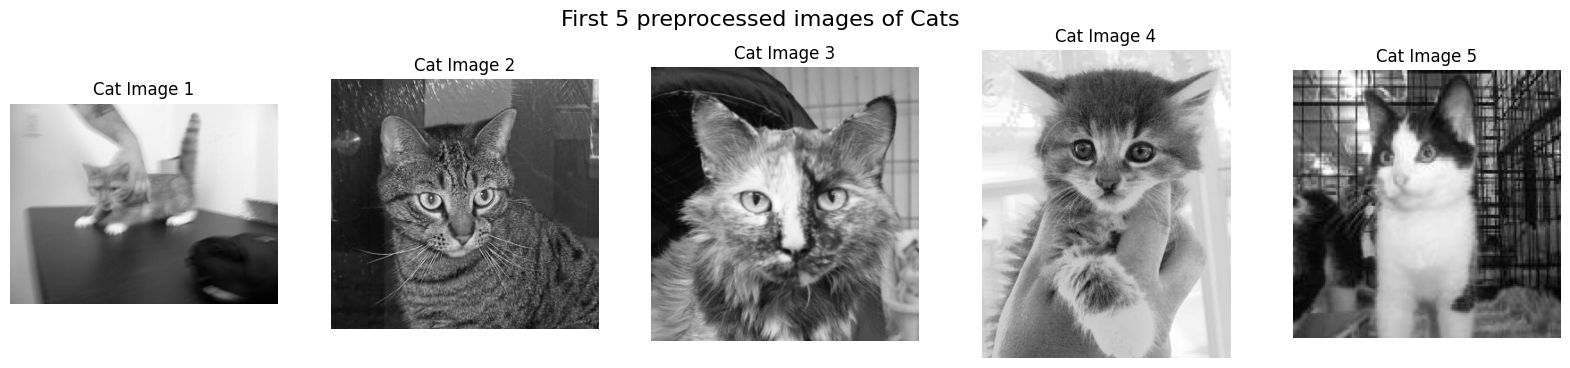

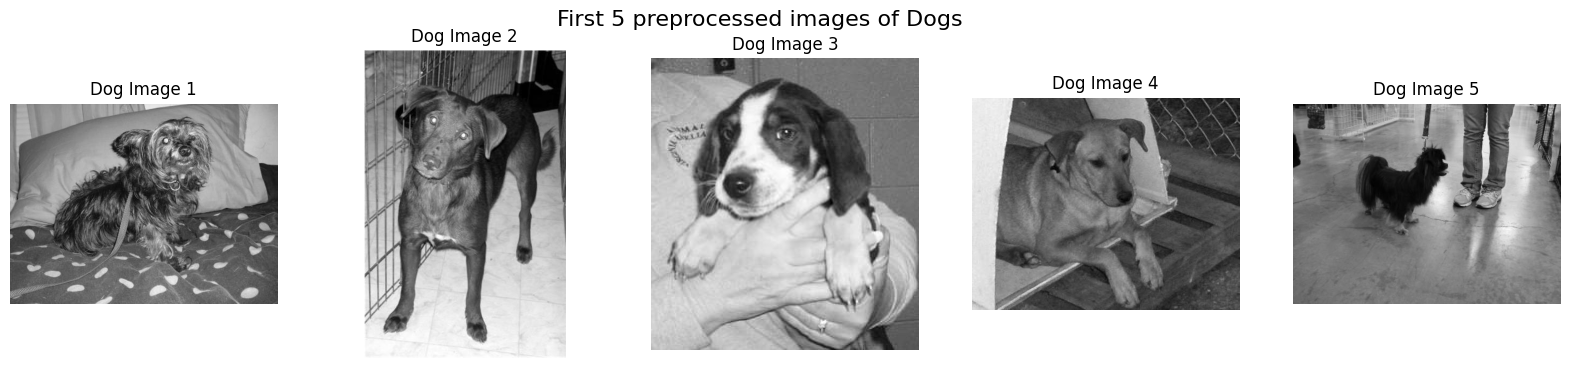

In [44]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the paths to the preprocessed Cat and Dog images
cat_train_path = train_path + '/Cat'
dog_train_path = train_path + '/Dog'

# Function to load and display images
def display_images(image_folder, label):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(f"First 5 preprocessed images of {label}s", fontsize=16)
    for i, ax in enumerate(axes):
        img = cv2.imread(os.path.join(image_folder, sorted(os.listdir(image_folder))[i]), cv2.IMREAD_GRAYSCALE)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{label} Image {i+1}")
        ax.axis('off')
    plt.show()

# Display first 5 preprocessed Cat images
display_images(cat_train_path, 'Cat')

# Display first 5 preprocessed Dog images
display_images(dog_train_path, 'Dog')


In [32]:
# Iterate through all files in the source directory
first_dir = test_path + '/Dog'
new_dir = datapath + '/Val/Dog'

if not os.path.exists(new_dir):
    os.makedirs(new_dir)

for filename in sorted(os.listdir(first_dir)):
    # Get the image number from the filename
    image_number = int(filename.split('.')[0])
    
    # Decide the target directory based on the image number
    if image_number < 12000:
        # Construct the full file paths
        source_file_path = os.path.join(first_dir, filename)
        target_file_path = os.path.join(new_dir, filename)
    
        # Copy the file to the target directory
        copyfile(source_file_path, target_file_path)
        
        # Remove the file from the testing directory
        os.remove(source_file_path)

print("Image transfer completed!")

Image transfer completed!


In [33]:
source_directory = all_cats

# Define the directory where grayscale images will be saved
first_target_directory = train_path + '/Cat'

# Define the directory where the remaining grayscale images will be saved
second_target_directory = test_path + '/Cat'

# Create the target directories if they don't exist
if not os.path.exists(first_target_directory):
    os.makedirs(first_target_directory)
if not os.path.exists(second_target_directory):
    os.makedirs(second_target_directory)

# Iterate through all files in the source directory
for filename in sorted(os.listdir(source_directory)):
    if filename != 'Thumbs.db' and filename.endswith('.jpg'):
        # Get the image number from the filename
        image_number = int(filename.split('.')[0])
        
        # Decide the target directory based on the image number
        if image_number < 11000:
            target_directory = first_target_directory
        else:
            target_directory = second_target_directory
        
        # Construct the full file path
        file_path = os.path.join(source_directory, filename)
        
        # Open the image
        with Image.open(file_path) as img:
            # Convert the image to grayscale
            grayscale_img = img.convert('L')
            
            # Construct the full path for the destination
            grayscale_path = os.path.join(target_directory, filename)
            
            # Save the grayscale image
            grayscale_img.save(grayscale_path)

print("Conversion to grayscale completed!")


Conversion to grayscale completed!


In [34]:
# Iterate through all files in the source directory
first_dir_cat = test_path + '/Cat'
new_dir_cat = datapath + '/Val/Cat'

if not os.path.exists(new_dir_cat):
    os.makedirs(new_dir_cat)

for filename in sorted(os.listdir(first_dir_cat)):
    # Get the image number from the filename
    image_number = int(filename.split('.')[0])
    
    # Decide the target directory based on the image number
    if image_number < 12000:
        # Construct the full file paths
        source_file_path = os.path.join(first_dir_cat, filename)
        target_file_path = os.path.join(new_dir_cat, filename)
    
        # Copy the file to the target directory
        copyfile(source_file_path, target_file_path)
        
        # Remove the file from the testing directory
        os.remove(source_file_path)

print("Cat image transfer completed!")


Cat image transfer completed!


In [38]:
# Initialize lists to store resized images and labels
X_train_resized = []
y_train = []

# Load, resize, and extract features from the preprocessed Cat images
for filename in os.listdir(cat_train_path):
    img = cv2.imread(os.path.join(cat_train_path, filename), cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to a consistent size (e.g., 100x100)
    img_resized = cv2.resize(img, (100, 100))
    
    # Flatten the resized image to a 1D array
    features = img_resized.flatten()
    
    # Append features to X_train_resized
    X_train_resized.append(features)
    
    # Append label (0 for Cat)
    y_train.append(0)

# Load, resize, and extract features from the preprocessed Dog images
for filename in os.listdir(dog_train_path):
    img = cv2.imread(os.path.join(dog_train_path, filename), cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to a consistent size (e.g., 100x100)
    img_resized = cv2.resize(img, (100, 100))
    
    # Flatten the resized image to a 1D array
    features = img_resized.flatten()
    
    # Append features to X_train_resized
    X_train_resized.append(features)
    
    # Append label (1 for Dog)
    y_train.append(1)

# Convert lists to numpy arrays
X_train_resized = np.array(X_train_resized)
y_train = np.array(y_train)

# Initialize and train the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resized, y_train)

print("Training completed!")


Training completed!


In [39]:
# Define the paths to the preprocessed Cat and Dog test images
cat_test_path = test_path + '/Cat'
dog_test_path = test_path + '/Dog'

# Initialize lists to store resized test images and labels
X_test_resized = []
y_test = []

# Load, resize, and extract features from the preprocessed Cat test images
for filename in os.listdir(cat_test_path):
    img = cv2.imread(os.path.join(cat_test_path, filename), cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to a consistent size (e.g., 100x100)
    img_resized = cv2.resize(img, (100, 100))
    
    # Flatten the resized image to a 1D array
    features = img_resized.flatten()
    
    # Append features to X_test_resized
    X_test_resized.append(features)
    
    # Append label (0 for Cat)
    y_test.append(0)

# Load, resize, and extract features from the preprocessed Dog test images
for filename in os.listdir(dog_test_path):
    img = cv2.imread(os.path.join(dog_test_path, filename), cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to a consistent size (e.g., 100x100)
    img_resized = cv2.resize(img, (100, 100))
    
    # Flatten the resized image to a 1D array
    features = img_resized.flatten()
    
    # Append features to X_test_resized
    X_test_resized.append(features)
    
    # Append label (1 for Dog)
    y_test.append(1)

# Convert lists to numpy arrays
X_test_resized = np.array(X_test_resized)
y_test = np.array(y_test)

# Predict labels for the test set
y_pred = rf_classifier.predict(X_test_resized)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


Test accuracy: 0.626


In [40]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[347 153]
 [221 279]]


In [41]:
# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.6458333333333334
Recall: 0.558
F1-score: 0.5987124463519313


In [42]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       500
           1       0.65      0.56      0.60       500

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.62      1000
weighted avg       0.63      0.63      0.62      1000

